## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

In the next phase of recepe recommandation system, Data related to user feedback and rating are taken into consideration with the existing recepe data with a view to identify insights about user's preferences and engagement with the recepe. This will help to identify corelation between recepe characteristics and user preferences 

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [47]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore

##### RawRecipe : Dataset in classes and methods

In [48]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [49]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [50]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recepe Id

In [51]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Data Preprocessing

In [52]:
# Count nutrition for recepe
merged_data['n_nutrition'] = merged_data['nutrition'].apply(lambda x: len(x))
# Convert date into datetime format of python
merged_data['date'] = pd.to_datetime(merged_data['date'])
# Differentiate year from date
merged_data['year'] = merged_data['date'].dt.to_period('Y')
# Differentiate year with month from date
merged_data['month'] = merged_data['date'].dt.to_period('M')

# Sort data with date
processed_data = merged_data.sort_values(by='date')

processed_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,n_nutrition,year,month
559965,jalapeno pepper poppers,992,30,1545,1999-09-06,"['30-minutes-or-less', 'time-to-make', 'course...","[111.4, 14.0, 3.0, 7.0, 8.0, 24.0, 1.0]",11,"['in a mixing bowl , combine cheeses , bacon a...","originally from ""taste of home"" magazine","['cream cheese', 'sharp cheddar cheese', 'mont...",10,2008,992,2000-01-25,5,better than any you can get at a restaurant!,39,2000,2000-01
532444,hooters buffalo wings,3603,27,2353,1999-09-24,"['30-minutes-or-less', 'time-to-make', 'course...","[867.1, 96.0, 2.0, 59.0, 97.0, 128.0, 8.0]",16,"['combine the flour , paprika , cayenne pepper...",from top secret recipes http://www.topsecretre...,"['butter', 'louisiana hot sauce', 'pepper', 'g...",12,2008,3603,2000-01-25,4,better than having to actually GO to a Hooters...,42,2000,2000-01


### Null hypothesis
People are more health conscious with the time.i.e consuming more nutritions compared to history. 

### Alternet hypothesis
There is no improvement in people's food choices considering nutrition. 

#### Nutrition consumption vs time between 2000 to 2018

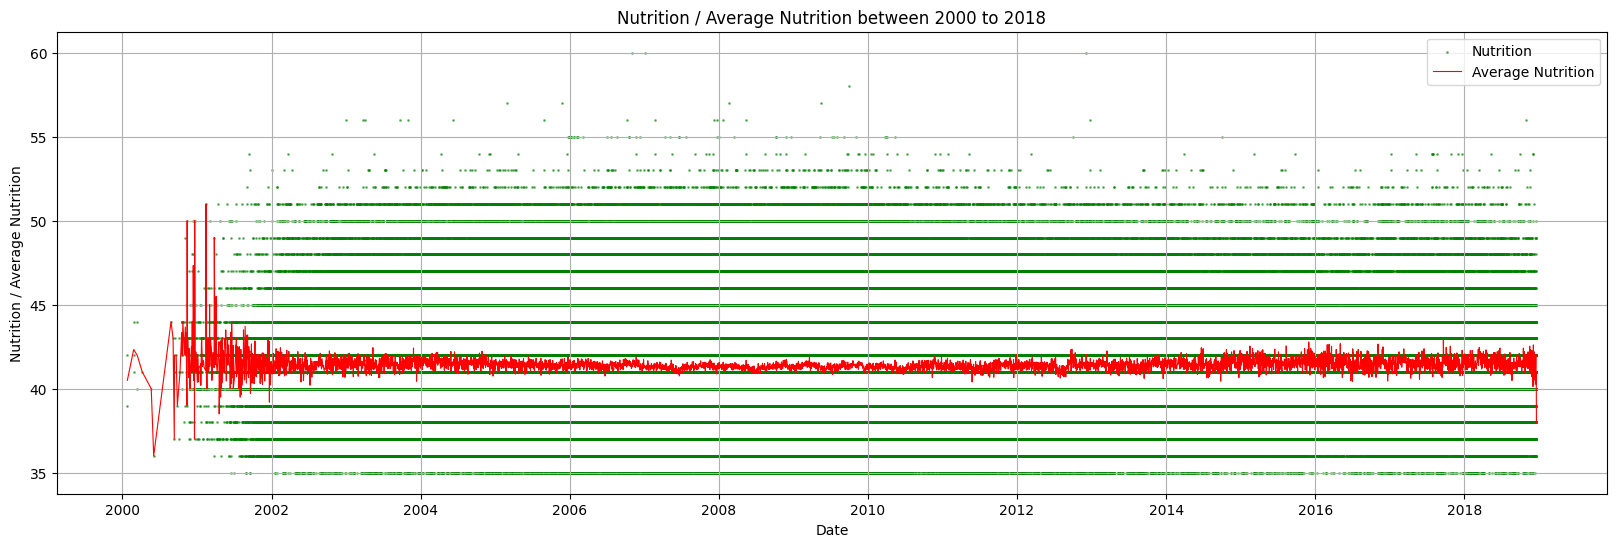

In [53]:

# Calculate average number of nutritioan by date
average_nutrition_by_date = processed_data.groupby('date')['n_nutrition'].mean()

# Set the figure size
plt.figure(figsize=(20, 6))

# Scatter plot for n_nutrition vs. date
plt.scatter(processed_data['date'], processed_data['n_nutrition'], color='g', label='Nutrition', alpha=0.5, s=1)

# Plot the average number of Nutrition over time
plt.plot(average_nutrition_by_date.index, average_nutrition_by_date, color='r', label='Average Nutrition', linewidth=0.8)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Nutrition / Average Nutrition')
plt.title('Nutrition / Average Nutrition between 2000 to 2018')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

#### Neutirition time series

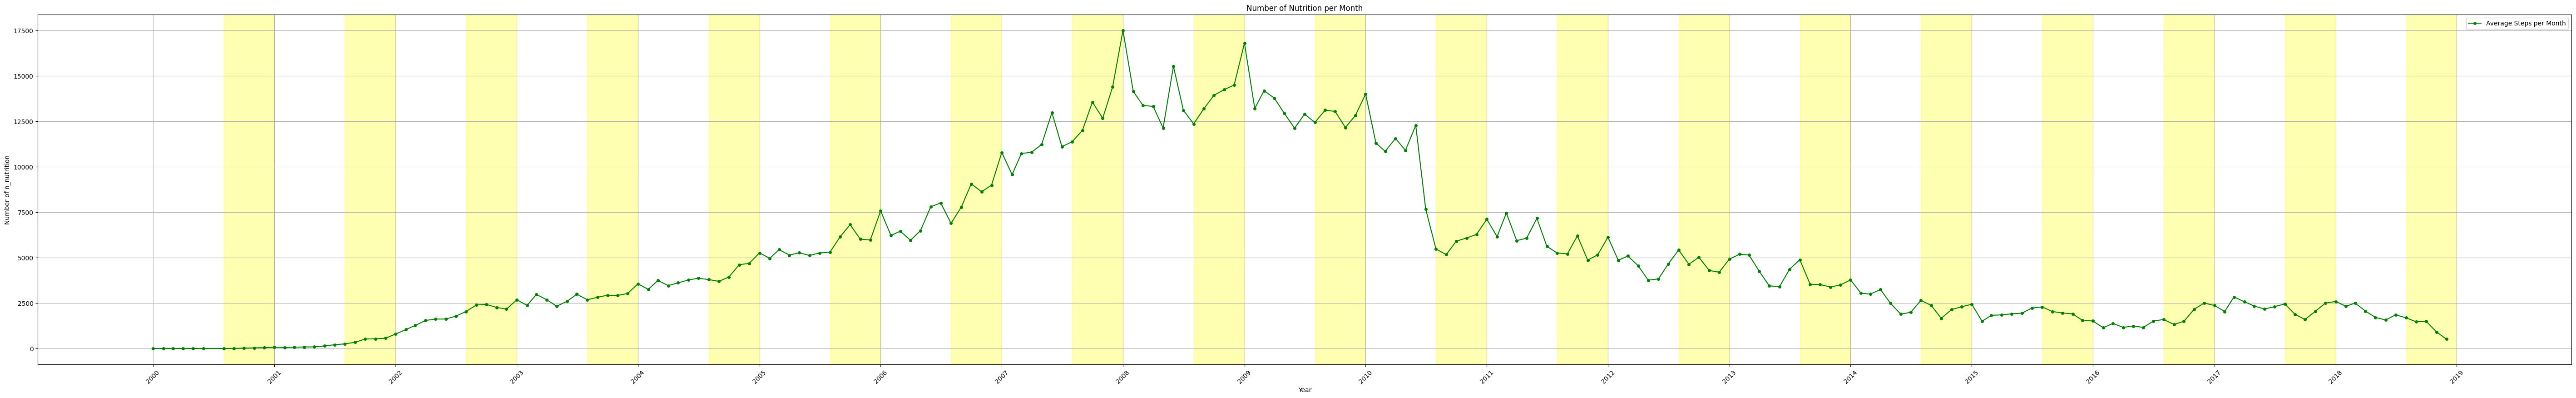

In [54]:
df2 = processed_data
# Convert 'date' column to Period format for monthly grouping
df2['date'] = df2['date'].dt.to_period('M')

# Group by 'date' and count the number of reviews (or steps) for each month
steps_per_month = df2.groupby('date').size().reset_index(name='n_nutrition')

# Convert the 'date' column back to timestamp for plotting
steps_per_month['date'] = steps_per_month['date'].dt.to_timestamp()

# Create a time series plot
plt.figure(figsize=(36, 10))
plt.plot(steps_per_month['date'], steps_per_month['n_nutrition'], marker='o', color='g', label='Average Steps per Month', linewidth=1.5, markersize=4)

# Highlight the specified months (August to January)
for year in range(2000, 2019):
    plt.axvspan(pd.Timestamp(f'{year}-08-01'), pd.Timestamp(f'{year}-12-31'), color='yellow', alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Locator to display every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks to show year only


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of n_nutrition')
plt.title('Number of Nutrition per Month')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()
